In [2]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 
import numpy as np

In [3]:
#path= r'F:\\TMSL\\pic\\pro_image.jpeg'
path = 'F:\\TMSL\\pic\\project.jpeg'
image = img.imread(path)

In [4]:
r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]      #Separates the Red, Green, and Blue channels from the image array.

#adjusts pixel intensity values to correct for nonlinearities
gamma = 1.04

#constants represent the perceived luminance contributions 
r_const, g_const,b_const = 0.2126, 0.7152, 0.0722

#Applies gamma correction and each color channel is then scaled by its respective luminance contribution
grayscale_image = r_const * r ** gamma + g_const * g ** gamma + b_const * b ** gamma


In [5]:
# Define a threshold value
#sets the cutoff for converting grayscale intensities to binary
threshold = 127

# Convert to binary manually
binary_image = np.zeros_like(grayscale_image)  # Initialize binary image
for i in range(grayscale_image.shape[0]):
    for j in range(grayscale_image.shape[1]):
        if grayscale_image[i, j] > threshold:       #Accesses the intensity value of the pixel at row i and column j
            binary_image[i, j] = 1  # Assign 1 if above threshold
        else:
            binary_image[i, j] = 0  # Assign 0 otherwise

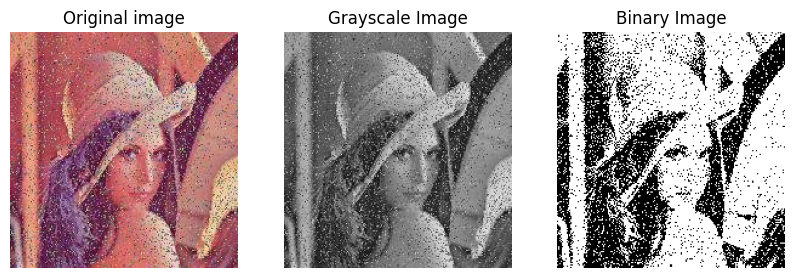

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10,7))

axes[0].imshow(image)
axes[0].set_title("Original image")  # Title for the first image
axes[0].axis("off")

axes[1].imshow(grayscale_image, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis("off")

axes[2].imshow(binary_image,  cmap='gray')
axes[2].set_title("Binary Image")
axes[2].axis("off")
plt.show()

Histogram: [13679 22981]


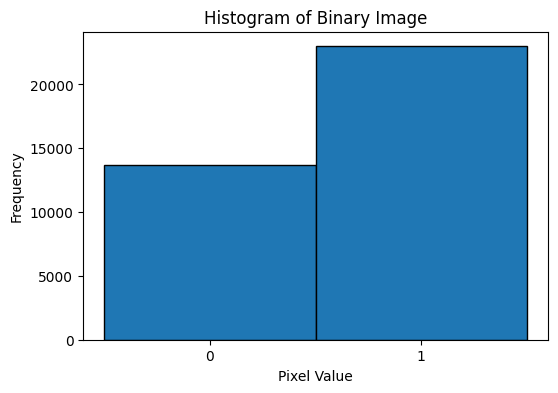

In [16]:
hist, bin_edges = np.histogram(binary_image, bins=[-0.5, 0.5, 1.5])

# Display histogram values
print("Histogram:", hist)

# Plot the histogram
plt.figure(figsize=(6, 4))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor="black", align="edge")
plt.title("Histogram of Binary Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xticks([0, 1])  # Adjust x-axis ticks
plt.show()

In [7]:
from scipy.ndimage import gaussian_filter
from scipy.ndimage import median_filter

In [8]:
smoothed_image = gaussian_filter(binary_image.astype(float), sigma=2) #sigma is standard deviation for the Gaussian kernel

filtered_image = median_filter(binary_image, size=3)  # 3x3 filter

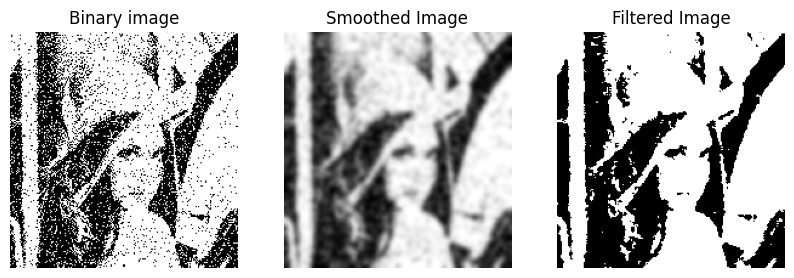

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(10,7))

axes[0].imshow(binary_image,cmap='gray')
axes[0].set_title("Binary image")  # Title for the first image
axes[0].axis("off")

axes[1].imshow(smoothed_image, cmap='gray')
axes[1].set_title("Smoothed Image")
axes[1].axis("off")

axes[2].imshow(filtered_image,  cmap='gray')
axes[2].set_title("Filtered Image")
axes[2].axis("off")
plt.show()

Histogram: [13698 22962]


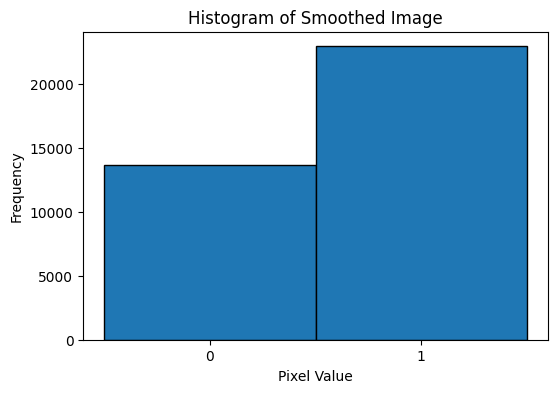

In [12]:
hist, bin_edges = np.histogram(smoothed_image, bins=[-0.5, 0.5, 1.5])

# Display histogram values
print("Histogram:", hist)

# Plot the histogram
plt.figure(figsize=(6, 4))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor="black", align="edge")
plt.title("Histogram of Smoothed Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xticks([0, 1])  # Adjust x-axis ticks
plt.show()

Histogram: [13769 22891]


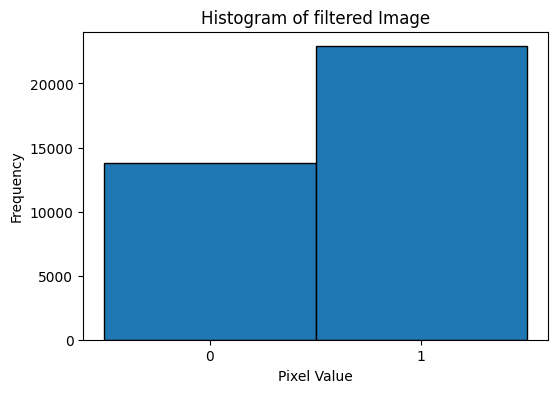

In [21]:
hist, bin_edges = np.histogram(filtered_image, bins=[-0.5, 0.5, 1.5])

# Display histogram values
print("Histogram:", hist)

# Plot the histogram
plt.figure(figsize=(6, 4))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor="black", align="edge")
plt.title("Histogram of filtered Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xticks([0, 1])  # Adjust x-axis ticks
plt.show()